In [1]:
import pandas as pd

In [26]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Classificação/Metricas/churn_data.xlsx')

In [3]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
# Arrumando o tipo de variável
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors ='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7031 non-null   float64
 8   Churn             7042 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


In [28]:
df = df.dropna()

In [29]:
from sklearn.model_selection import train_test_split

In [12]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# SEparando as categoricas e numericas
cat_vars = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

modeling_vars = cat_vars + num_vars

In [31]:
# Filtrando pelas colunas passadas e copiando, apenas outra maneira de fazer isso
x = df.filter(modeling_vars).copy()

y = df['Churn'].copy()

In [32]:
y = pd.DataFrame(y)

## Fazendo o labelencoder para deixar as categoricas como numericas
 No y vamos usar o LabelEncoder, mas o X vamos usar o getdummies

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
# Ajustando o Y
le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

In [38]:
# Ajusatando o X
x = pd.get_dummies(x)

In [37]:
x.head()

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,0,1,0,0,1,0


In [39]:
x_train, x_teste, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

lr = model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
predict= lr.predict(x_teste)

In [53]:
# Criando e atribuindo mais colunas ao dataset e mostrando aquilo que é real com o que foi predito
x_teste.assign(churn = y_test).assign(label = lr.predict(x_teste))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
200,27,101.90,2681.15,0,1,0,1,0,0,1,0,1,0,0,0,0
4281,50,35.00,1782.40,1,0,1,0,0,0,1,0,0,0,1,0,0
3592,1,45.65,45.65,0,1,1,0,0,0,1,0,0,1,0,1,1
5469,33,79.00,2576.80,0,1,1,0,0,0,1,0,1,0,0,0,0
2953,20,105.85,2239.65,0,1,1,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,67,70.90,4677.10,0,1,0,0,1,1,0,0,1,0,0,0,0
5981,38,20.20,746.05,0,1,0,0,1,0,1,0,0,0,1,0,0
2192,56,85.65,4824.45,0,1,0,0,1,0,1,1,0,0,0,0,0
6886,8,101.35,780.50,0,1,1,0,0,1,0,0,0,1,0,1,1


## Metrificando o modelo

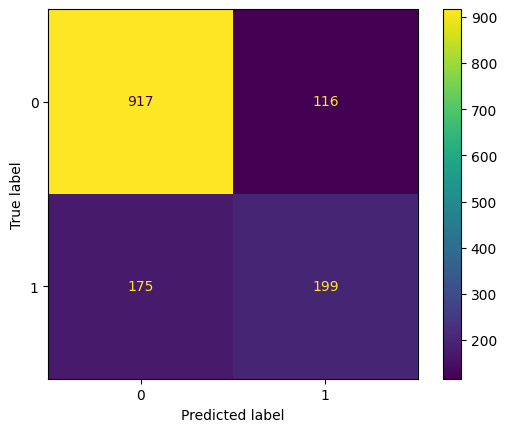

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predict, labels=lr.classes_)
cm = confusion_matrix(y_test, predict, labels=lr.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lr.classes_)

disp.plot()

# Matreix de confusão criada

In [59]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [63]:
print(f'Acurácia Treino: {accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia Test: {accuracy_score(y_test, lr.predict(x_teste))}')
print('============================================================= \n')

print(f'Balanciamento Treino: {balanced_accuracy_score(y_train, lr.predict(x_train))}')
print(f'Balanciamento Test: {balanced_accuracy_score(y_test, lr.predict(x_teste))}')
print('============================================================= \n')

print(f'Precisão Treino: {precision_score(y_train, lr.predict(x_train))}')
print(f'Precisão Test: {precision_score(y_test, lr.predict(x_teste))}')
print('============================================================= \n')

print(f'Recall Treino: {recall_score(y_train, lr.predict(x_train))}')
print(f'Recall Test: {recall_score(y_test, lr.predict(x_teste))}')
print('============================================================= \n')

print(f'F1_Score Treino: {f1_score(y_train, lr.predict(x_train))}')
print(f'Acurácia Test: {f1_score(y_test, lr.predict(x_teste))}')
print('============================================================= \n')

print(f'ROC Treino: {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}')
print(f'ROC Test: {roc_auc_score(y_test, lr.predict_proba(x_teste)[:,1])}')
print('============================================================= \n')


# Podemos notar e verificar que algumas das metricas como a acuracia está alta, mas vendo o F1 vemos que não está tão alta
# Com isso indicando que estamos acertando, mas por conta que a maioria dos dados está em uma classe de valores e não porque o modelo está perfomando incrível.

Acurácia Treino: 0.7978307254623044
Acurácia Test: 0.7931769722814499

Balanciamento Treino: 0.714461379701937
Balanciamento Test: 0.7098956365085857

Precisão Treino: 0.6436597110754414
Precisão Test: 0.6317460317460317

Recall Treino: 0.5364548494983278
Recall Test: 0.5320855614973262

F1_Score Treino: 0.5851878876322509
Acurácia Test: 0.5776487663280115

ROC Treino: 0.8391160978185944
ROC Test: 0.834370842414234



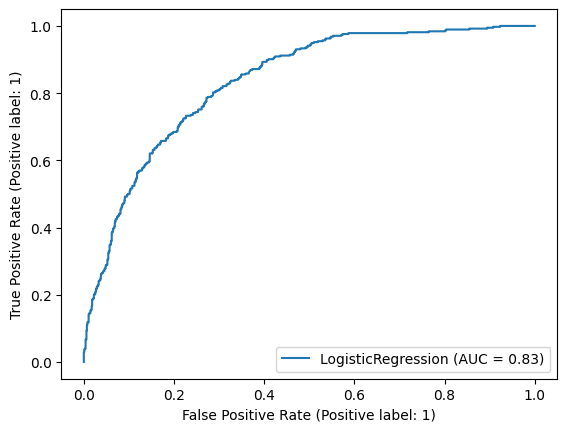

In [64]:
from sklearn.metrics import RocCurveDisplay

lr_disp = RocCurveDisplay.from_estimator(lr, x_teste, y_test)
# Temos uma AUC bem alta de 0.83 um bom parametro

In [68]:
# Plotando as bases de treino e teste uma do lado da outra

metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(x_train)), accuracy_score(y_test, lr.predict(x_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(x_train)), balanced_accuracy_score(y_test, lr.predict(x_test))],
    'precision': [precision_score(y_train, lr.predict(x_train)), precision_score(y_test, lr.predict(x_test))],
    'recall': [recall_score(y_train, lr.predict(x_train)), recall_score(y_test, lr.predict(x_test))],
    'f1_score': [f1_score(y_train, lr.predict(x_train)), f1_score(y_test, lr.predict(x_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(x_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.797831,0.714461,0.643660,0.536455,0.585188,0.839116
1,Logistic Regression,teste,0.793177,0.709896,0.631746,0.532086,0.577649,0.834371
